In [33]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("",low_memory=False) #keep your dataset path in double quote(" ")
df.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0.0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1.0,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2.0,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3.0,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4.0,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [35]:
# Basic cleaning

# Convert Date to datetime (I know the format is MM-DD-YYYY)
df['Date'] = pd.to_datetime(df['Date'], format="%m-%d-%Y", errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Create a Revenue column (Qty * Amount)
df['Revenue'] = df['Qty'] * df['Amount']

# Check data info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 128441 entries, 0 to 128974
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128440 non-null  float64       
 1   Order ID            128440 non-null  object        
 2   Date                55109 non-null   datetime64[ns]
 3   Status              128440 non-null  object        
 4   Fulfilment          128440 non-null  object        
 5   Sales Channel       128440 non-null  object        
 6   ship-service-level  128440 non-null  object        
 7   Style               128440 non-null  object        
 8   SKU                 128440 non-null  object        
 9   Category            128440 non-null  object        
 10  Size                128440 non-null  object        
 11  ASIN                128440 non-null  object        
 12  Courier Status      121609 non-null  object        
 13  Qty                 128440 non-nul

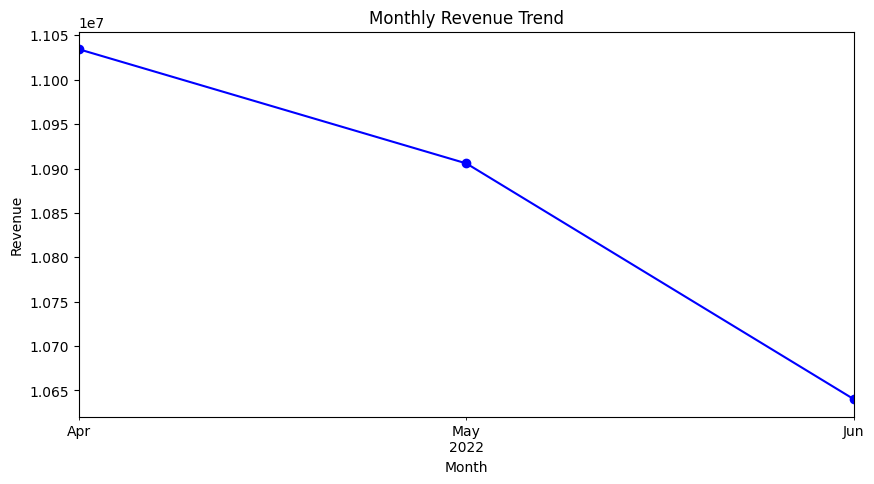

In [36]:
#  Monthly revenue trend

# Group by month and calculate sum of revenue
monthly_revenue = df.groupby(df['Date'].dt.to_period("M"))['Revenue'].sum()

# Plot the monthly revenue
plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


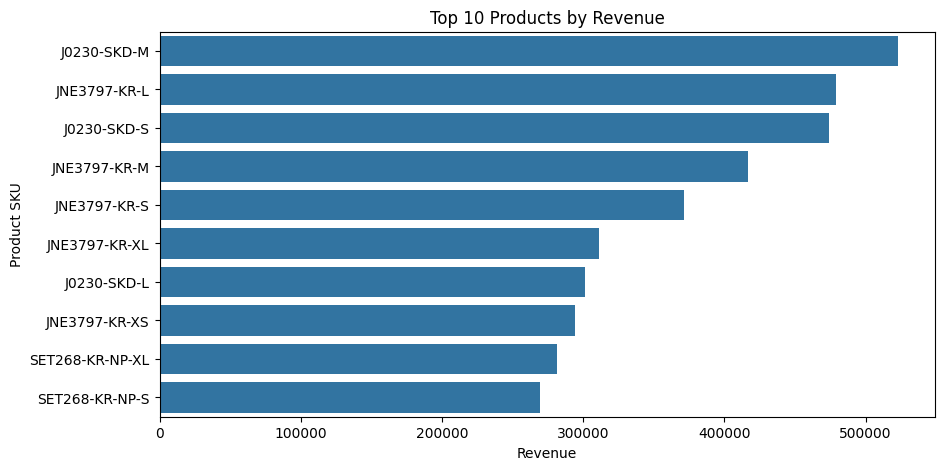

In [37]:
#Top 10 products by revenue
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product SKU")
plt.show()


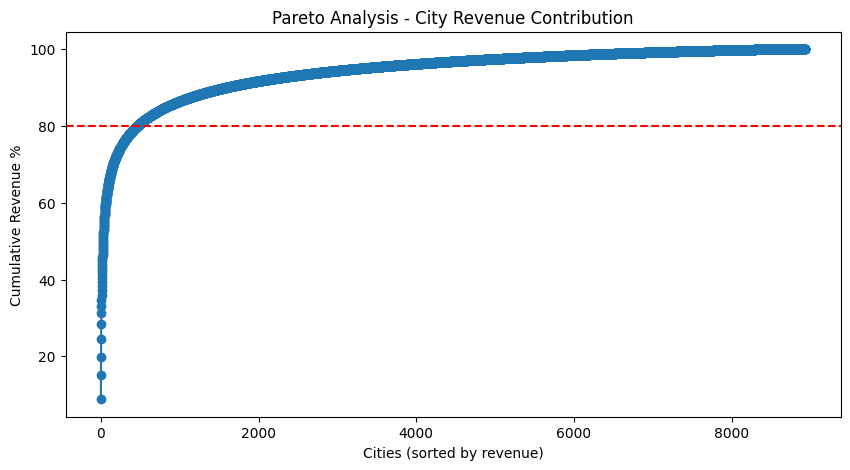

In [38]:
#Pareto analysis (80/20 rule) for cities

city_revenue = df.groupby('ship-city')['Revenue'].sum().sort_values(ascending=False)

#Calculate cumulative %
cumulative = city_revenue.cumsum() / city_revenue.sum() * 100

plt.figure(figsize=(10,5))
plt.plot(cumulative.values, marker='o')
plt.axhline(y=80, color='red', linestyle='--')
plt.title("Pareto Analysis - City Revenue Contribution")
plt.xlabel("Cities (sorted by revenue)")
plt.ylabel("Cumulative Revenue %")
plt.show()
